# Marketing Analytics - Paphawit

>**“If you can’t explain it simply, you don’t understand it well enough.”**
— Albert Einstein

**Marketing Analytics** is the essential process of a company. It will help company to make better decision. For the right decision, the company will gain huge profit with minimum effort. On the other hand, the bad decision, it will cost huge lost in revenue.

For that reason, this dataset will explain the example on how to use marketing data in Statistics and Machine Learning. The table have 28 columns and 2240 rows. The column description is collected from *Thiago Fraletti* in Kaggle discussion section.

***

# Table of Contents

- [Feature Description](#feature)
- [Reading Data](#read-data)
- [Data Cleaning](#data-cleaning)
- [Data Exploring](#data-exploring)
    - [Univariate Analysis](#univariate)
    - [Bivariate Analysis](#bivariate)
- [Preparing Data for Machine Learning](#preparing)
    - [Normalizer Data](#normalizer)
    - [One Hot Encoding Data](#one-hot)
    - [Train / Test Split Data](#train-test)
- [Cluster Analysis](#cluster-analysis)
    - [K-Means Clustering](#k-means)
- [Machine Learning Algorithms](#machine-learning)
    - [Logistic Regression Classifier](#logistic-regression)
    - [Decision Tree Classifier](#decision-tree)
    - [Support Vertor Machine Classifier](#svc)
    - [Gradient Boosting Classifier](#gradient-boosting-classifier)

***

# Feature Description <a class="anchor" id="feature"></a>

The features of this dataset are consist of:
- **Demographic** (DtCustomer, Education, Marital, Kidhome, Teenhome, Income)
- **Purchasing record** (amount spent on product, number of purchase and web visit)
- **Campaign record** (the acceptance of the campaign)

The predictor is `Response` feature which means the customer will accept the last campaign or not. The other feature list is shown as below:

Feature Description
- `AcceptedCmp1` -> 1 if customer accepted the offer in the 1st campaign. 0 otherwise
- `AcceptedCmp2` -> 1 if customer accepted the offer in the 2nd campaign. 0 otherwise 
- `AcceptedCmp3` -> 1 if customer accepted the offer in the 3rd campaign. 0 otherwise 
- `AcceptedCmp4` -> 1 if customer accepted the offer in the 4th campaign. 0 otherwise 
- `AcceptedCmp5` -> 1 if customer accepted the offer in the 5th campaign. 0 otherwise 
- `Response` -> 1 if customer accepted the offer in the last campaign. 0 otherwise (target)
- `Complain` -> 1 if customer complained in the last 2 years
- `DtCustomer` -> date of customer's enrollment with the company
- `Education` -> customer's level of education
- `Marital` -> customer's marital status
- `Kidhome` -> number of small children in customer's household
- `Teenhome` -> number of teenagers in customer's household
- `Income` -> customer's yearly household income
- `MntFishProducts` -> amount spent on fish products in the last 2 years
- `MntMeatProducts` -> amount spent on meat products in the last 2 years
- `MntFruits` -> amount spent on fruits in the last 2 years
- `MntSweetProducts` -> amount spent on sweet products in the last 2 years
- `MntWines` -> amount spent on wines in the last 2 years
- `MntGoldProds` -> amount spent on gold products in the last 2 years
- `NumDealsPurchases` -> number of purchases made with discount
- `NumCatalogPurchases` -> number of purchases made using catalogue
- `NumStorePurchases` -> number of purchases made directly in stores
- `NumWebPurchases` -> number of purchases made through company's web site
- `NumWebVisitsMonth` -> number of visits to company's web site in the last month 
- `Recency` -> number of days since the last purchase

The technique that would be used on this dataset are:
- **Customer Segmentation** (by KMean Clustering)
- **Predict the target** (`Response`) (by using Logistic Regression Classifier / Decision Tree Classifier / Support Vector Machine Classifier / Gradient Boosting Classifier)

***

# Reading Data <a class="anchor" id="read-data"></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #to see all column in dataframe
df_read = pd.read_csv('marketing_data.csv')

***

# Data Cleaning <a class="anchor" id="data-cleaning"></a>

For data cleaning process, first, import **Pandas** to see the information. (by using `head()` and `info()` function.)

In [2]:
df_read.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Some columns in dataset can be changed in the following:
- `ID` can be set to index
- `Year_Birth` can be converted to Age (for easier intrepret)
- `Income` can be converted to float (for using in machine learning)
- `Dt_Customer` can be converted to Number of Year to be customer (for future classification)

In [3]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

There are some missing value in `Income` feature. The feature need to use dropna function to clean up (also to eliminate white space in this column name.)

In [4]:
df = df_read.copy() #create new dataframe from original dataframe
df = df.rename(columns={' Income ': 'Income'}) #rename Income feature by eliminating space
df = df.set_index('ID') #set index to customer ID
df = df.dropna(subset=['Income']) #delete out 24 rows that is missing
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float) #eliminate dollar sign and convert income from string to float
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"]).dt.strftime('%Y') #convert Dt_Customer feature into year
df['Year_of_Customer'] = 2021 - df['Dt_Customer'].astype(int) #convert Dt_Customer to Year_of_Customer for preparing for future classification
df['Age'] = 2021 - df['Year_Birth'] #change Year_Birth feature into Age (for easier intrepret)
df = df.drop(['Year_Birth','Dt_Customer'],axis=1) #drop the feature that no more usage
df = df.sort_index() #sort ID customer for easier reference
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Year_of_Customer,Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Graduation,Married,70951.0,0,0,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,0,SA,8,36
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,7,60
9,Master,Single,46098.0,1,1,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA,9,46
13,PhD,Widow,25358.0,0,1,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA,8,74
17,PhD,Married,60491.0,0,1,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,0,SP,8,50


In [5]:
# Rearrage new converted column to be the same as original data set
df = df.reindex(columns = ['Age','Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Year_of_Customer',
                           'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                           'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
                           'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                           'Response', 'Complain', 'Country'])

***

# Data Exploring <a class="anchor" id="data-exploring"></a>

At the beginning of machine learning steps, the dataset should be understood in each individual column and relationship between them.

Import **Matplotlib** and **Seaborn** for visualize the data. (This notebook will be use Seaborn as the main plotting library.)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2') #set theme color of graph

## Univariate Analysis <a class="anchor" id="univariate"></a>

Univariate Analysis will help to understand each individual columns, starting by using `describe()` function to see overall statistics.

In [7]:
df.describe().T.apply(lambda x: np.round(x, decimals=2)) #use function and transpose and round number to two decimal for ealier to intre

,count,mean,std,min,25%,50%,75%,max
Age,2216.0,52.18,11.99,25.0,44.0,51.0,62.00,128.0
Income,2216.0,52247.25,25173.08,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.44,0.54,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.51,0.54,0.0,0.0,0.0,1.00,2.0
Year_of_Customer,2216.0,7.97,0.69,7.0,8.0,8.0,8.00,9.0
Recency,2216.0,49.01,28.95,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.09,337.33,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.36,39.79,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,167.00,224.28,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.64,54.75,0.0,3.0,12.0,50.00,259.0


Create function to plot each individual columns.

In [8]:
#configuration plotting
def plot_config(figsize, xticks_rotation, title, ylim):
    plt.figure(figsize=figsize)
    plt.xticks(rotation=xticks_rotation)
    plt.title(title)
    plt.ylim(ylim)

#create number label in histogram    
def histogram_label(histogram, space):
    for p in histogram.patches:
        height = p.get_height()
        histogram.text(x = p.get_x()+(p.get_width()/2),
        y = height+space,
        s = '{:.0f}'.format(height),
        ha = 'center')
        
#create number label in countplot        
def countplot_label(label_value, space):
    for index,data in enumerate(label_value):
        plt.text(index,data+space,'{:,}'.format(data),horizontalalignment='center',rotation='0')

**Age of customer** is nearly normal distributed. The range is in between 29-78 years old. The median age is 51.

In [9]:
pd.DataFrame(df['Age'].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
Age,2216.0,52.18,11.99,25.0,44.0,51.0,62.0,128.0


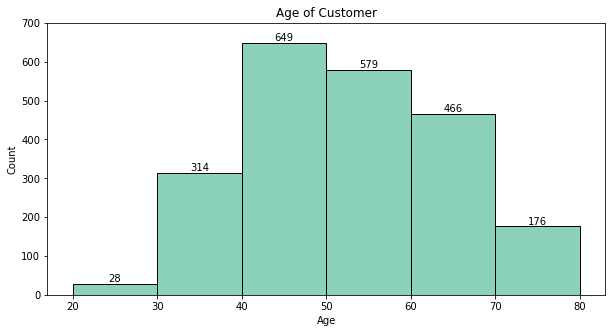

In [10]:
plot_config(figsize=(10,5), xticks_rotation=0 , title='Age of Customer', ylim=(0,700))
customer_histplot = sns.histplot(df['Age'], bins=np.histogram_bin_edges(df['Age'], bins=6, range=(20, 80)))
histogram_label(histogram=customer_histplot, space=5)

**Customer Education** is mostly in graduation (n=1116). The column has five unique value.

In [11]:
pd.DataFrame(df['Education'].describe()).T

,count,unique,top,freq
Education,2216,5,Graduation,1116


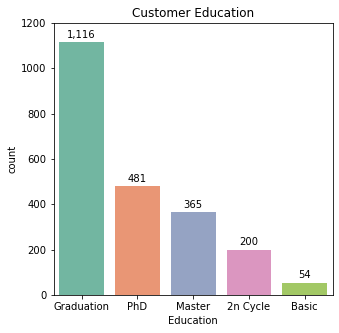

In [12]:
plot_config(figsize=(5,5), xticks_rotation=0 , title='Customer Education', ylim=(0,1200))
education_countplot = sns.countplot(x='Education', data=df, order=df['Education'].value_counts().index)
countplot_label(label_value=df['Education'].value_counts().sort_values(ascending=False),space=20)

**Marital Status** is mostly in married. For Alone, YOLO and Absurd status, the sample is small. The column will be dropped some row which have these three status. The maximum sample is came from married.

In [13]:
pd.DataFrame(df['Marital_Status'].describe()).T

,count,unique,top,freq
Marital_Status,2216,8,Married,857


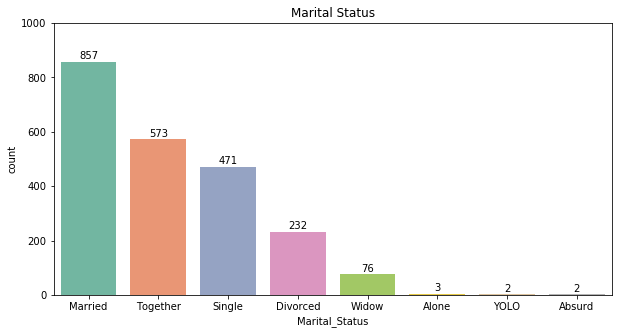

In [14]:
plot_config(figsize=(10,5), xticks_rotation=0, title='Marital Status', ylim=(0,1000))
marital_countplot = sns.countplot(x='Marital_Status', data=df, order = df['Marital_Status'].value_counts().index)
countplot_label(label_value=df['Marital_Status'].value_counts().sort_values(ascending=False), space=10)

**Customer Income** is normally distributed. this column need to cut off outlier. Because of outlier, the max and min value is very different and it manipulate overall statistic.

In [15]:
pd.DataFrame(df['Income'].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.25,25173.08,1730.0,35303.0,51381.5,68522.0,666666.0


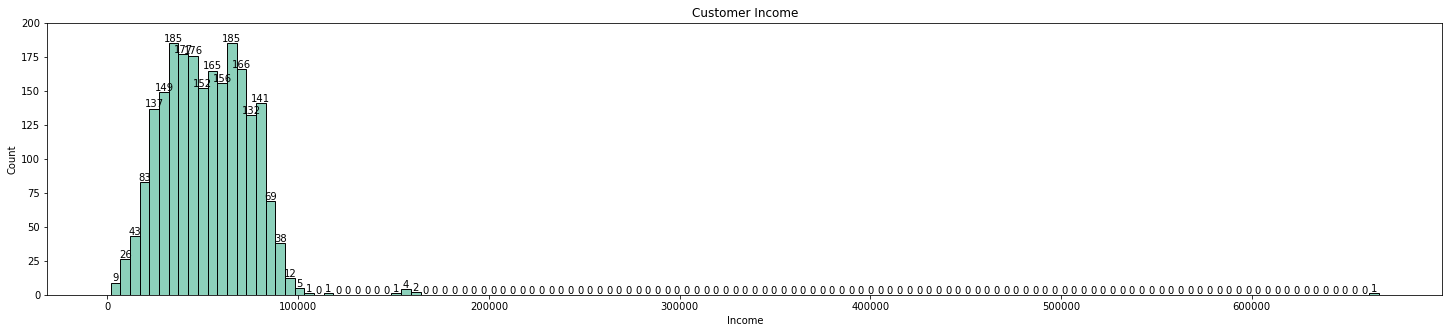

In [16]:
plot_config(figsize=(25,5), xticks_rotation=0, title='Customer Income', ylim=(0,200))
income_histplot = sns.histplot(df['Income'])
histogram_label(histogram=income_histplot, space=1)

**Number of Kid in Home** is mostly in not have any kid. The column has zero, one and two value which mean the number of kid in the customer home.

In [17]:
pd.DataFrame(df['Kidhome'].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
Kidhome,2216.0,0.44,0.54,0.0,0.0,0.0,1.0,2.0


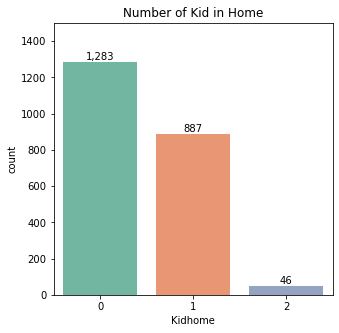

In [18]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Number of Kid in Home', ylim=(0,1500))
kidhome_countplot = sns.countplot(x='Kidhome', data=df, order = df['Kidhome'].value_counts().index)
countplot_label(label_value=df['Kidhome'].value_counts().sort_values(ascending=False), space=15)

**Number of Teen in Home** is equally between zero and one.

In [19]:
pd.DataFrame(df['Teenhome'].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
Teenhome,2216.0,0.51,0.54,0.0,0.0,0.0,1.0,2.0


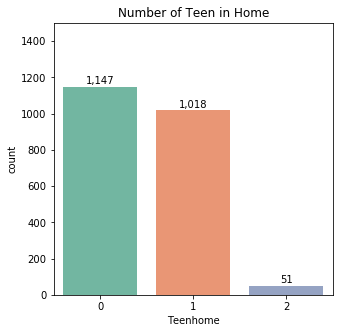

In [20]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Number of Teen in Home', ylim=(0,1500))
teenhome_countplot = sns.countplot(x='Teenhome', data=df, order = df['Teenhome'].value_counts().index)
countplot_label(label_value=df['Teenhome'].value_counts().sort_values(ascending=False), space=15)

**Year of Being Customer** is mostly in 8 years

In [21]:
pd.DataFrame(df['Year_of_Customer'].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
Year_of_Customer,2216.0,7.97,0.69,7.0,8.0,8.0,8.0,9.0


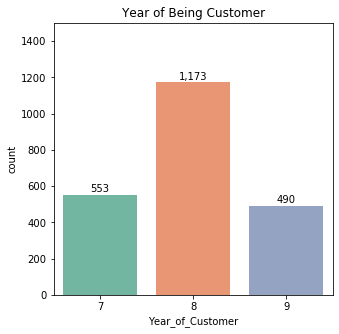

In [22]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Year of Being Customer', ylim=(0,1500))
year_countplot = sns.countplot(x='Year_of_Customer', data=df, order =sorted(df['Year_of_Customer'].value_counts().index))
countplot_label(label_value=df['Year_of_Customer'].value_counts().sort_index(), space=15)

**Number of days since the last purchase** is equally in each value.

In [23]:
pd.DataFrame(df['Recency'].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
Recency,2216.0,49.01,28.95,0.0,24.0,49.0,74.0,99.0


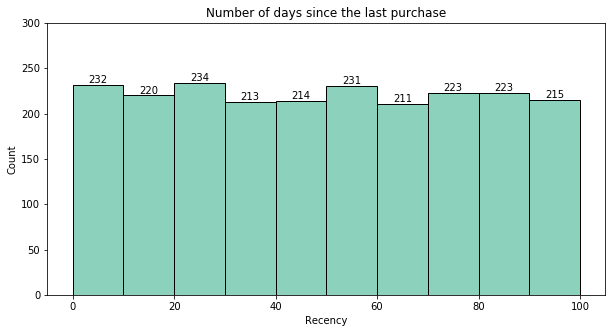

In [24]:
plot_config(figsize=(10,5), xticks_rotation=0, title='Number of days since the last purchase', ylim=(0,300))
recency_histplot = sns.histplot(df['Recency'],bins=np.histogram_bin_edges(df['Recency'], bins=10, range=(0, 100)))
histogram_label(histogram=recency_histplot, space=2)

**Amount spent on wines, fruits, sweet products, gold products** have the same distributed. The wines have highest mean which implies the customer spend more on wines.

In [25]:
pd.DataFrame(df[['MntWines','MntFruits','MntSweetProducts','MntGoldProds']].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
MntWines,2216.0,305.09,337.33,0.0,24.0,174.5,505.0,1493.0
MntFruits,2216.0,26.36,39.79,0.0,2.0,8.0,33.0,199.0
MntSweetProducts,2216.0,27.03,41.07,0.0,1.0,8.0,33.0,262.0
MntGoldProds,2216.0,43.97,51.82,0.0,9.0,24.5,56.0,321.0


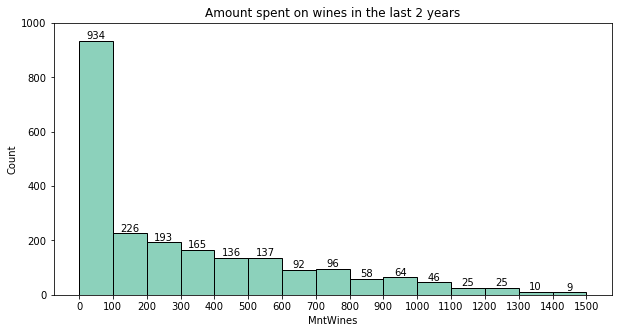

In [26]:
plot_config(figsize=(10,5),xticks_rotation=0, title='Amount spent on wines in the last 2 years', ylim=(0,1000))
plt.xticks(np.arange(0, 1600, 100))
wines_histplot = sns.histplot(df['MntWines'],bins=np.histogram_bin_edges(df['MntWines'], bins=15, range=(0, 1500)))
histogram_label(histogram=wines_histplot, space=7)

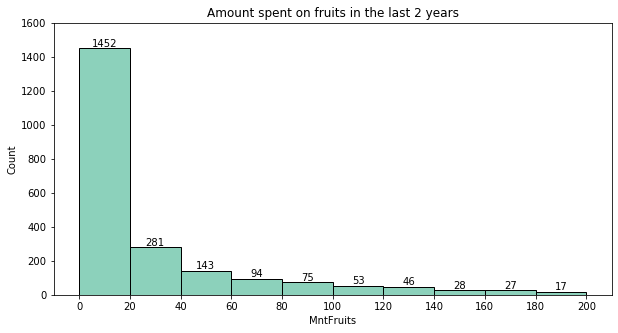

In [27]:
plot_config(figsize=(10,5), xticks_rotation=0, title='Amount spent on fruits in the last 2 years', ylim=(0,1600))
plt.xticks(np.arange(0, 220, 20))
fruits_histogram = sns.histplot(df['MntFruits'],bins=np.histogram_bin_edges(df['MntFruits'], bins=10, range=(0, 200)))
histogram_label(histogram=fruits_histogram, space=10)

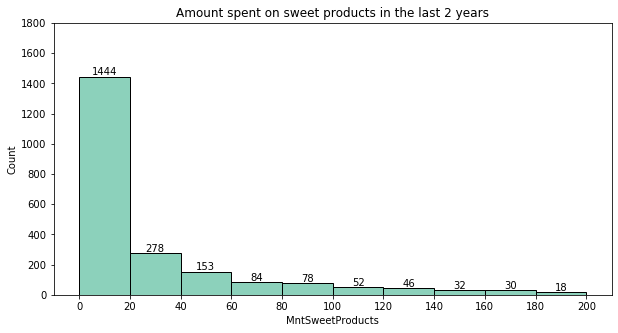

In [28]:
plot_config(figsize=(10,5), xticks_rotation=0, title='Amount spent on sweet products in the last 2 years', ylim=(0,1800))
plt.xticks(np.arange(0, 220, 20))
sweet_histogram = sns.histplot(df['MntSweetProducts'],bins=np.histogram_bin_edges(df['MntSweetProducts'], bins=10, range=(0, 200)))
histogram_label(histogram=sweet_histogram, space=10)

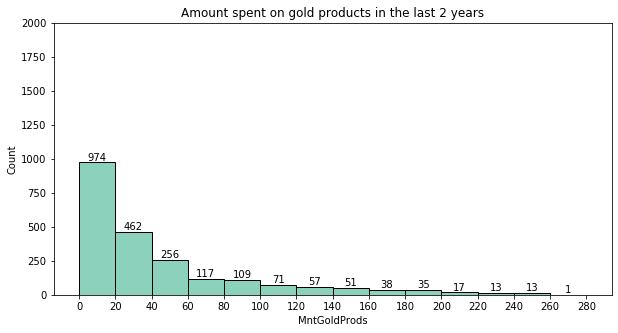

In [29]:
plot_config(figsize=(10,5), xticks_rotation=0, title='Amount spent on gold products in the last 2 years', ylim=(0,2000))
plt.xticks(np.arange(0, 300, 20))
gold_histogram = sns.histplot(df['MntGoldProds'],bins=np.histogram_bin_edges(df['MntGoldProds'], bins=14, range=(0, 280)))
histogram_label(histogram=gold_histogram, space=15)

These five below graph show the channel and how that customers purchase the company product. The store is the most channel of this dataset.

In [30]:
pd.DataFrame(df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
NumDealsPurchases,2216.0,2.32,1.92,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,2216.0,4.09,2.74,0.0,2.0,4.0,6.0,27.0
NumCatalogPurchases,2216.0,2.67,2.93,0.0,0.0,2.0,4.0,28.0
NumStorePurchases,2216.0,5.80,3.25,0.0,3.0,5.0,8.0,13.0
NumWebVisitsMonth,2216.0,5.32,2.43,0.0,3.0,6.0,7.0,20.0


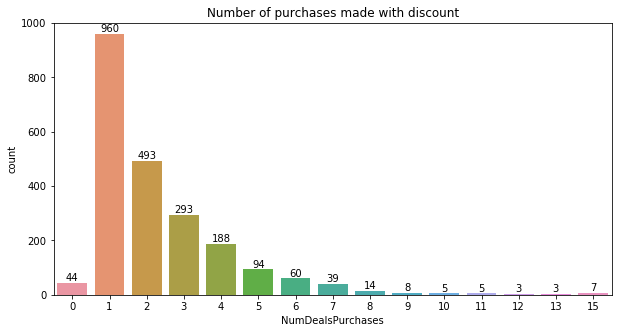

In [31]:
plot_config(figsize=(10,5), xticks_rotation=0, title='Number of purchases made with discount', ylim=(0,1000))
numdeal_countplot = sns.countplot(x='NumDealsPurchases', data=df, order = sorted(df['NumDealsPurchases'].value_counts().index))
countplot_label(label_value=df['NumDealsPurchases'].value_counts().sort_values(ascending=False).sort_index(), space=7)

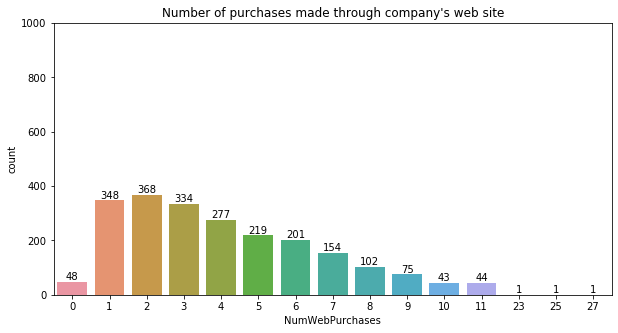

In [32]:
plot_config(figsize=(10,5), xticks_rotation=0, title="Number of purchases made through company's web site", ylim=(0,1000))
numweb_countplot = sns.countplot(x='NumWebPurchases', data=df, order = sorted(df['NumWebPurchases'].value_counts().index)).set(ylim=(0,1000))
countplot_label(label_value=df['NumWebPurchases'].value_counts().sort_values(ascending=False).sort_index(), space=7)

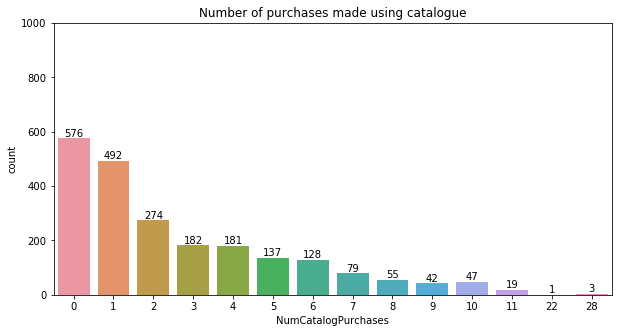

In [33]:
plot_config(figsize=(10,5), xticks_rotation=0, title='Number of purchases made using catalogue', ylim=(0,1000))
numcatalog_countplot = sns.countplot(x='NumCatalogPurchases', data=df, order = sorted(df['NumCatalogPurchases'].value_counts().index))
countplot_label(label_value=df['NumCatalogPurchases'].value_counts().sort_values(ascending=False).sort_index(), space=7)

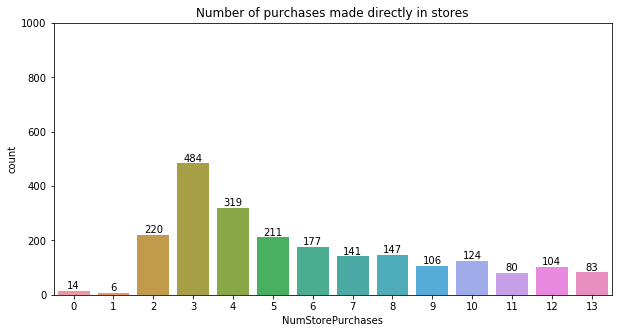

In [34]:
plot_config(figsize=(10,5), xticks_rotation=0, title='Number of purchases made directly in stores', ylim=(0,1000))
numstore_countplot = sns.countplot(x='NumStorePurchases', data=df, order = sorted(df['NumStorePurchases'].value_counts().index))
countplot_label(label_value=df['NumStorePurchases'].value_counts().sort_values(ascending=False).sort_index(), space=7)

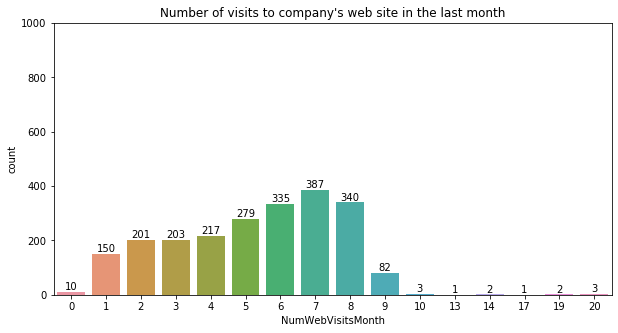

In [35]:
plot_config(figsize=(10,5), xticks_rotation=0, title="Number of visits to company's web site in the last month", ylim=(0,1000))
numweb_countplot = sns.countplot(x='NumWebVisitsMonth', data=df, order = sorted(df['NumWebVisitsMonth'].value_counts().index))
countplot_label(label_value=df['NumWebVisitsMonth'].value_counts().sort_values(ascending=False).sort_index(), space=7)

These six below charts show the acceptance of the campaign.

In [36]:
pd.DataFrame(df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
AcceptedCmp1,2216.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0
AcceptedCmp2,2216.0,0.01,0.12,0.0,0.0,0.0,0.0,1.0
AcceptedCmp3,2216.0,0.07,0.26,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2216.0,0.07,0.26,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2216.0,0.07,0.26,0.0,0.0,0.0,0.0,1.0


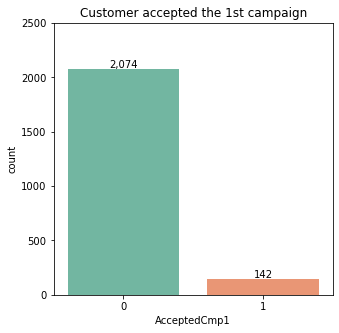

In [37]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Customer accepted the 1st campaign', ylim=(0,2500))
accept1_countplot = sns.countplot(x='AcceptedCmp1', data=df, order = df['AcceptedCmp1'].value_counts().index)
countplot_label(label_value=df['AcceptedCmp1'].value_counts().sort_values(ascending=False).sort_index(), space=15)

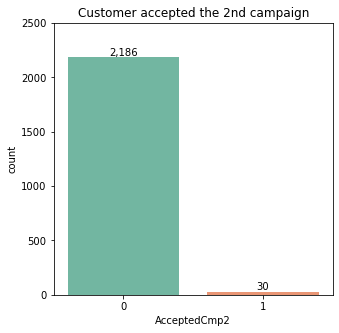

In [38]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Customer accepted the 2nd campaign', ylim=(0,2500))
accept2_countplot = sns.countplot(x='AcceptedCmp2', data=df, order = df['AcceptedCmp2'].value_counts().index)
countplot_label(label_value=df['AcceptedCmp2'].value_counts().sort_values(ascending=False).sort_index(), space=15)

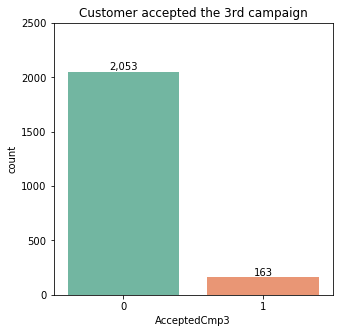

In [39]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Customer accepted the 3rd campaign', ylim=(0,2500))
accept3_countplot = sns.countplot(x='AcceptedCmp3', data=df, order = df['AcceptedCmp3'].value_counts().index)
countplot_label(label_value=df['AcceptedCmp3'].value_counts().sort_values(ascending=False).sort_index(), space=15)

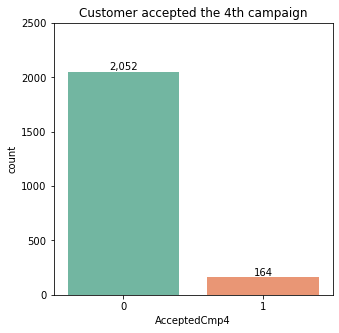

In [40]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Customer accepted the 4th campaign', ylim=(0,2500))
accept4_countplot = sns.countplot(x='AcceptedCmp4', data=df, order = df['AcceptedCmp4'].value_counts().index)
countplot_label(label_value=df['AcceptedCmp4'].value_counts().sort_values(ascending=False).sort_index(), space=15)

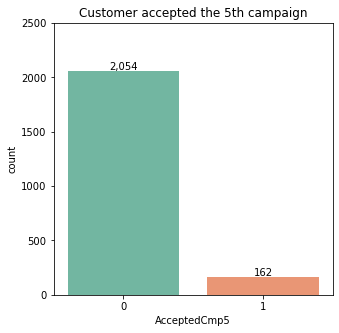

In [41]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Customer accepted the 5th campaign', ylim=(0,2500))
accept5_countplot = sns.countplot(x='AcceptedCmp5', data=df, order = df['AcceptedCmp5'].value_counts().index)
countplot_label(label_value=df['AcceptedCmp5'].value_counts().sort_values(ascending=False).sort_index(), space=15)

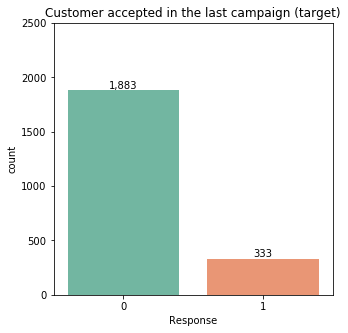

In [42]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Customer accepted in the last campaign (target)', ylim=(0,2500))
response_countplot = sns.countplot(x='Response', data=df, order = df['Response'].value_counts().index)
countplot_label(label_value=df['Response'].value_counts().sort_values(ascending=False).sort_index(), space=15)

In this dataset, customers are likely to not complain.

In [43]:
pd.DataFrame(df['Complain'].describe().apply(lambda x: np.round(x, decimals=2))).T

,count,mean,std,min,25%,50%,75%,max
Complain,2216.0,0.01,0.1,0.0,0.0,0.0,0.0,1.0


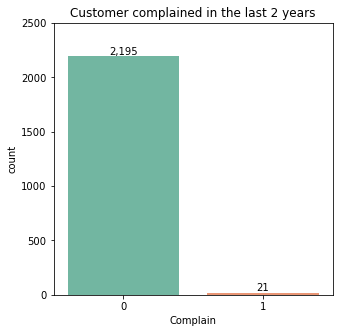

In [44]:
plot_config(figsize=(5,5), xticks_rotation=0, title='Customer complained in the last 2 years', ylim=(0,2500))
complain_countplot = sns.countplot(x='Complain', data=df, order = df['Complain'].value_counts().index)
countplot_label(label_value=df['Complain'].value_counts().sort_values(ascending=False).sort_index(), space=15)

**Customer's Country** is diversify. Otherhand, the ME is small and it need to be cut out.

In [45]:
pd.DataFrame(df['Country'].describe()).T

,count,unique,top,freq
Country,2216,8,SP,1093


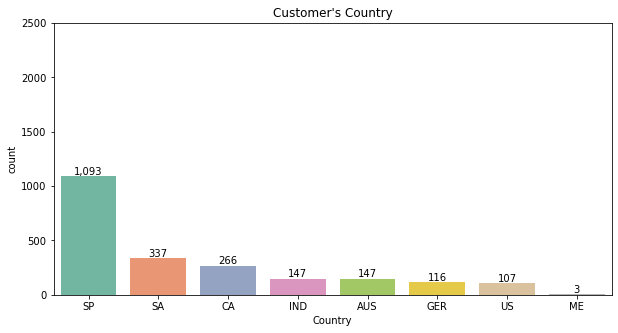

In [46]:
plot_config(figsize=(10,5), xticks_rotation=0, title="Customer's Country", ylim=(0,2500))
country_countplot = sns.countplot(x='Country', data=df, order = df['Country'].value_counts().index)
countplot_label(label_value=df['Country'].value_counts().sort_values(ascending=False), space=15)

After the reviewing of each individual column, the series have been eliminated the outlier.

In [47]:
#cut off the outlier
df = df[df['Age'].between(29,78,inclusive='both')]
df = df.query("Marital_Status not in ['Alone', 'Absurd', 'YOLO']")
df = df[df['Income'].between(0,100000,inclusive='both')]
df = df.query('MntGoldProds <= 270')
df = df.query('NumDealsPurchases <= 9')
df = df.query('NumCatalogPurchases <= 11')
df = df.query('NumWebVisitsMonth <= 9')
df = df.query("Country not in ['ME']")

Plot the final chart of all columns to see overall picture.

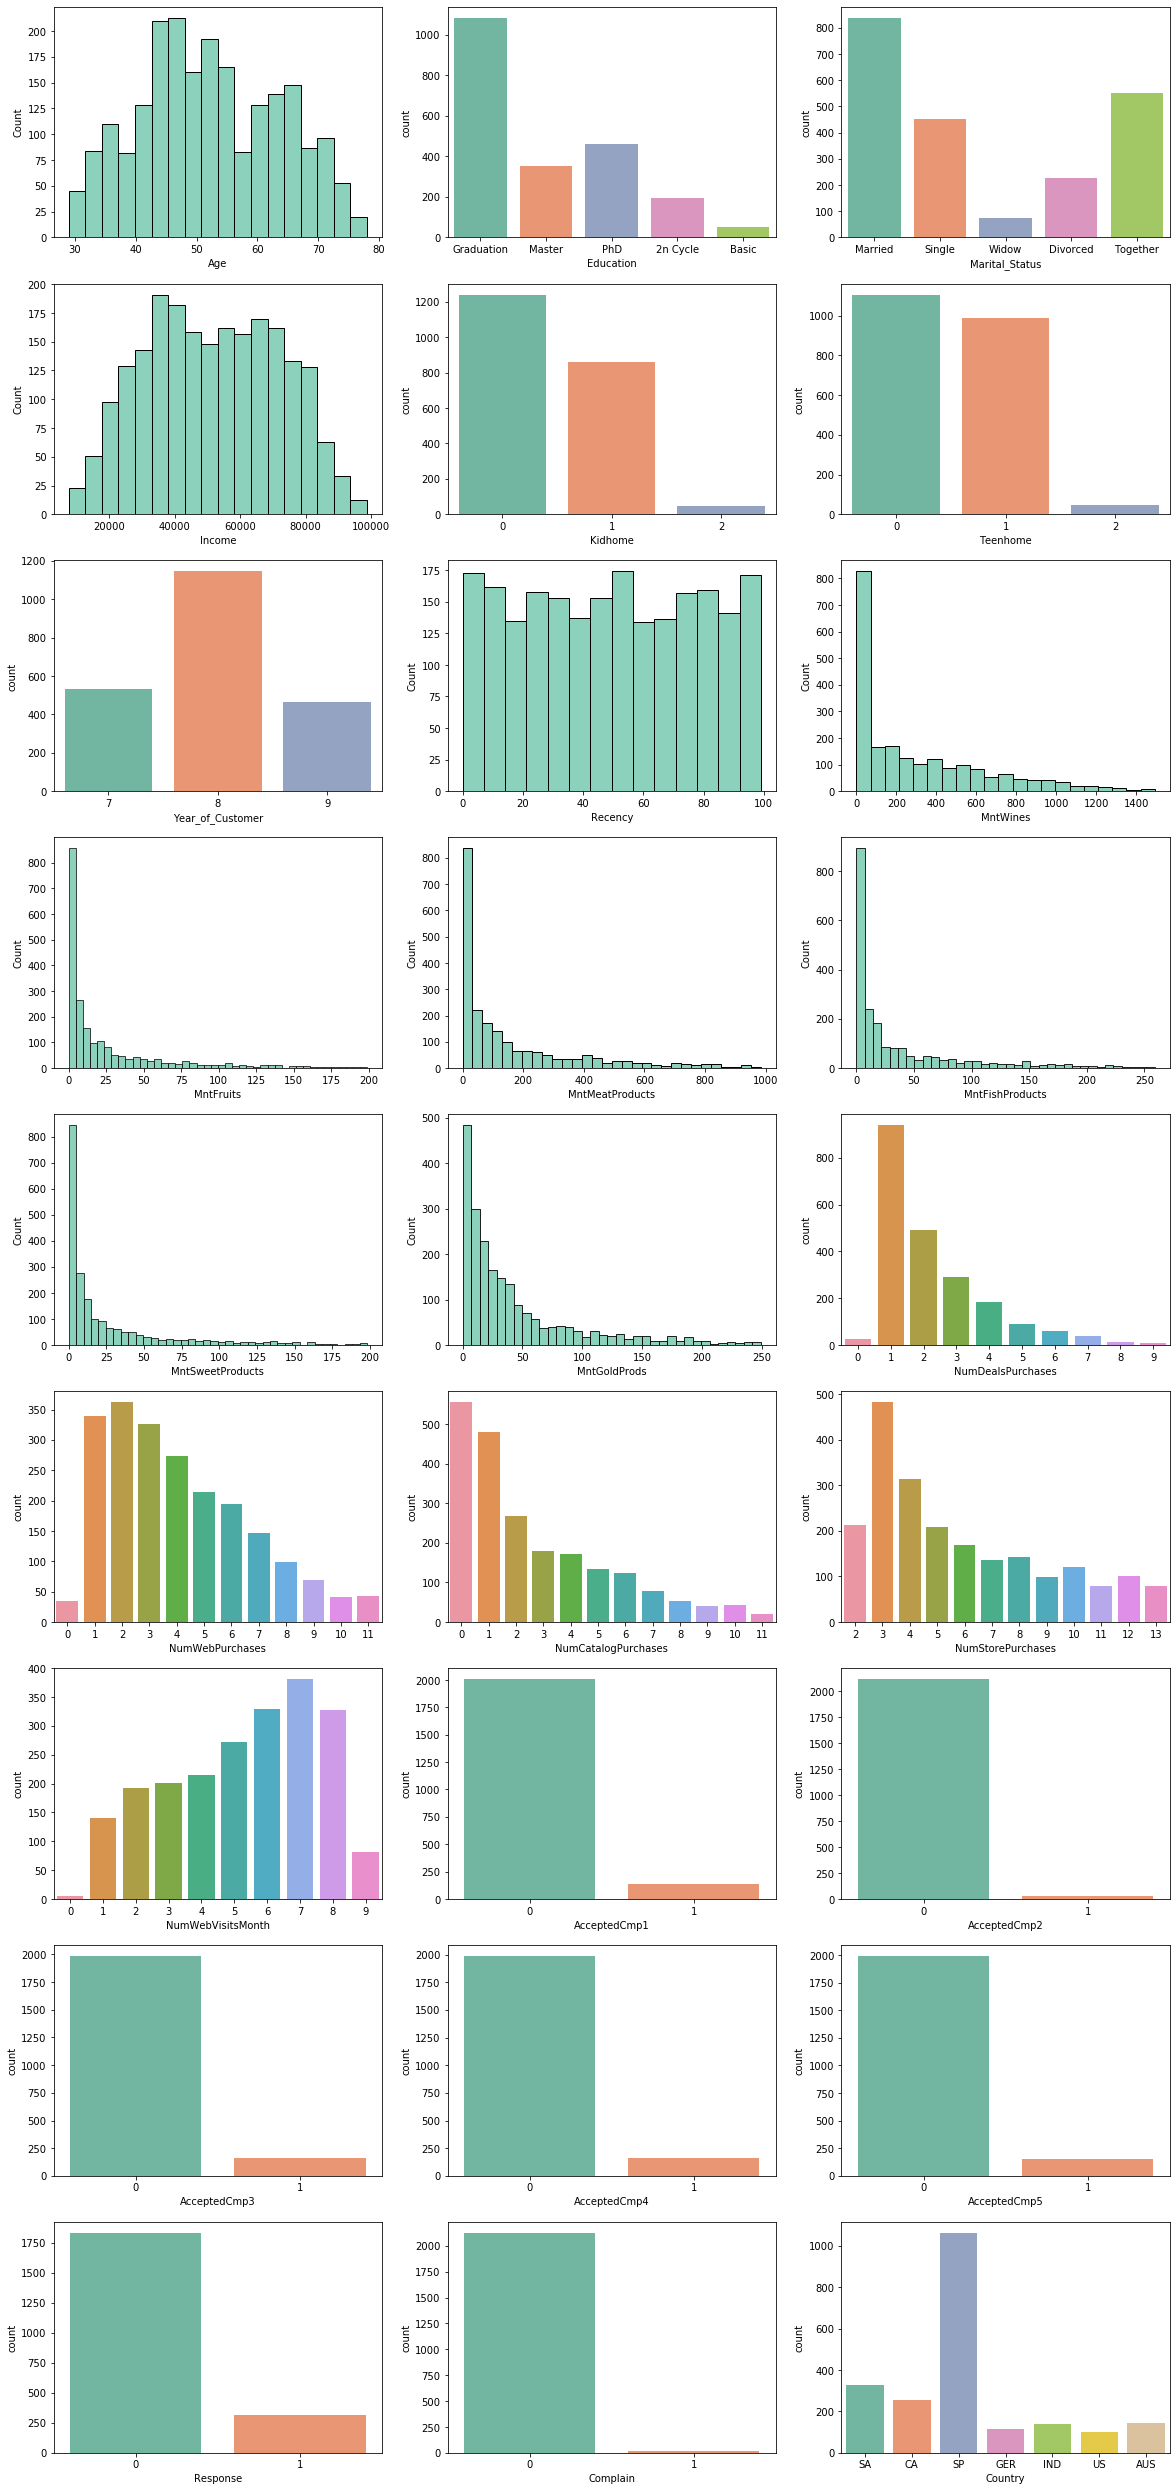

In [48]:
fig, axs = plt.subplots(nrows=9,ncols=3,figsize=(20,45))
sns.histplot(ax = axs[0,0],x='Age',data=df)
sns.countplot(ax = axs[0,1],x='Education',data=df)
sns.countplot(ax = axs[0,2],x='Marital_Status',data=df)
sns.histplot(ax = axs[1,0],x='Income',data=df)
sns.countplot(ax = axs[1,1],x='Kidhome',data=df)
sns.countplot(ax = axs[1,2],x='Teenhome',data=df)
sns.countplot(ax = axs[2,0],x='Year_of_Customer',data=df)
sns.histplot(ax = axs[2,1],x='Recency',data=df)
sns.histplot(ax = axs[2,2],x='MntWines',data=df)
sns.histplot(ax = axs[3,0],x='MntFruits',data=df)
sns.histplot(ax = axs[3,1],x='MntMeatProducts',data=df)
sns.histplot(ax = axs[3,2],x='MntFishProducts',data=df)
sns.histplot(ax = axs[4,0],x='MntSweetProducts',data=df)
sns.histplot(ax = axs[4,1],x='MntGoldProds',data=df)
sns.countplot(ax = axs[4,2],x='NumDealsPurchases',data=df)
sns.countplot(ax = axs[5,0],x='NumWebPurchases',data=df)
sns.countplot(ax = axs[5,1],x='NumCatalogPurchases',data=df)
sns.countplot(ax = axs[5,2],x='NumStorePurchases',data=df)
sns.countplot(ax = axs[6,0],x='NumWebVisitsMonth',data=df)
sns.countplot(ax = axs[6,1],x='AcceptedCmp1',data=df)
sns.countplot(ax = axs[6,2],x='AcceptedCmp2',data=df)
sns.countplot(ax = axs[7,0],x='AcceptedCmp3',data=df)
sns.countplot(ax = axs[7,1],x='AcceptedCmp4',data=df)
sns.countplot(ax = axs[7,2],x='AcceptedCmp5',data=df)
sns.countplot(ax = axs[8,0],x='Response',data=df)
sns.countplot(ax = axs[8,1],x='Complain',data=df)
sns.countplot(ax = axs[8,2],x='Country',data=df)

# Bivariate Analysis <a class="anchor" id="bivariate"></a>

Plot the heatmap with seaborn to see relationship between values.

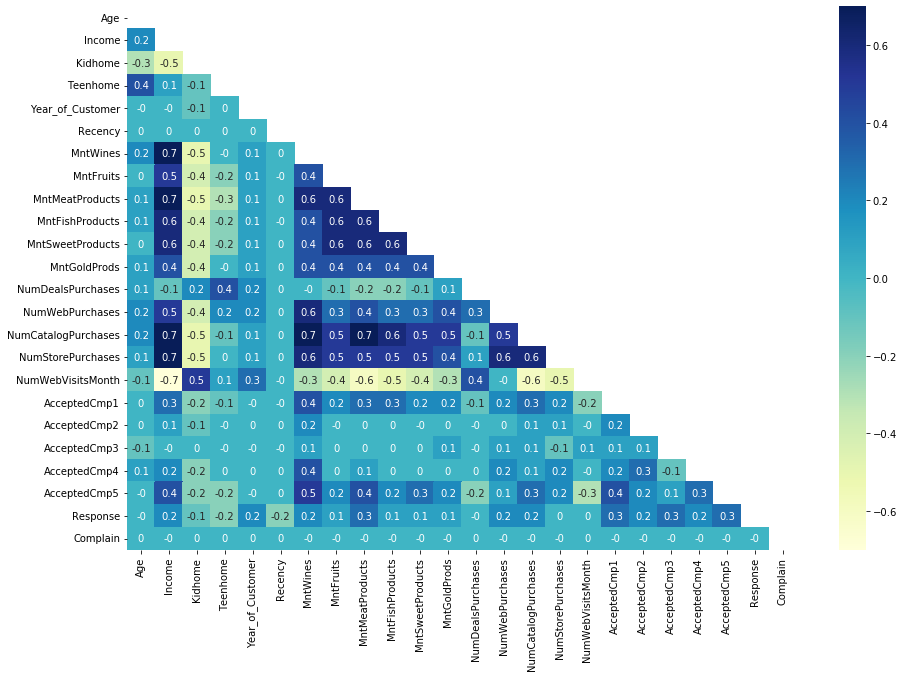

In [49]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) #cut off the top triangle of value
sns.heatmap(df.corr().round(1),annot=True, cmap="YlGnBu",mask=mask)

From above heatmap, the dataset are shown that:
- A customer who has high income tend to spend more. His main purchasing channel is on Catolog and Store. The second channel is Website. He tend to not have kid at home. The campaign that impact their decision is 1st and 5th campagin.
- A customer who has kid at home tend to spend less. he often visit a website and accept a few deal that the company offer.
- The five of campaian is significantly impact on amount of purchasing wines.

***

# Cluster Analysis <a class="anchor" id="cluster-analysis"></a>

## K-Means Clustering <a class="anchor" id="k-means"></a>

Use K-Means clustering to understand more on dataset.

In [50]:
from sklearn.cluster import KMeans

In [51]:
def plot_k(column_name,x,y):
    df_kmeans = df[[column_name]]
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(df_kmeans)
    sns.scatterplot(ax=axs_k[x,y],data=df,x='Age',y='Income',hue=kmeans.labels_,palette="Set2")
    axs_k[x,y].set_title(column_name)

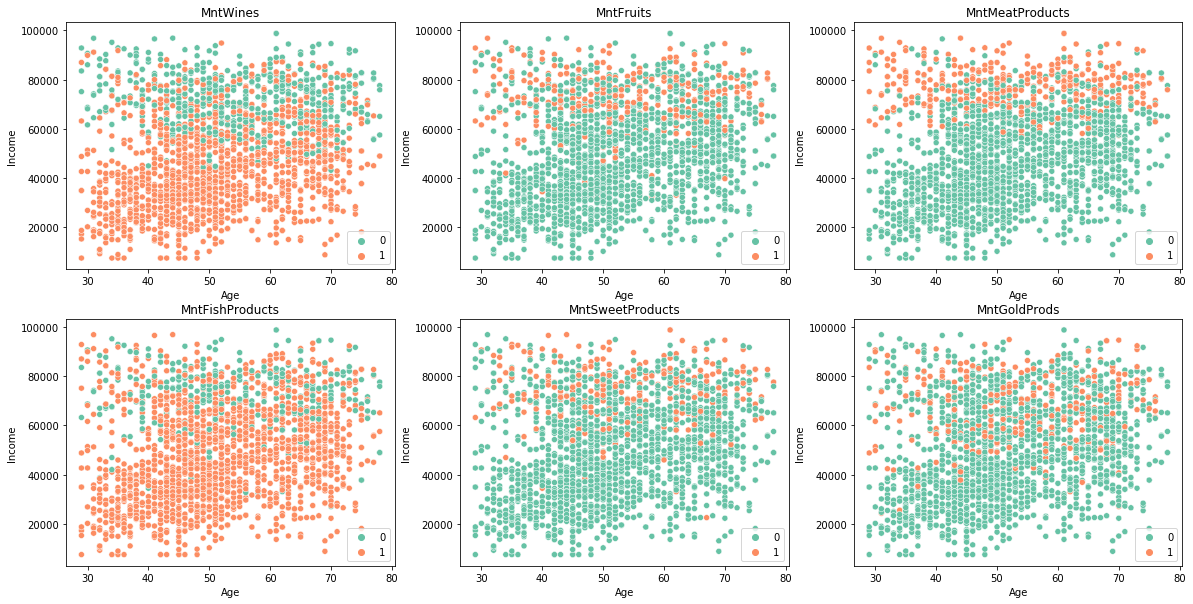

In [52]:
fig_k, axs_k = plt.subplots(nrows=2,ncols=3,figsize=(20,10))

plot_k('MntWines',0,0)
plot_k('MntFruits',0,1)
plot_k('MntMeatProducts',0,2)
plot_k('MntFishProducts',1,0)
plot_k('MntSweetProducts',1,1)
plot_k('MntGoldProds',1,2)

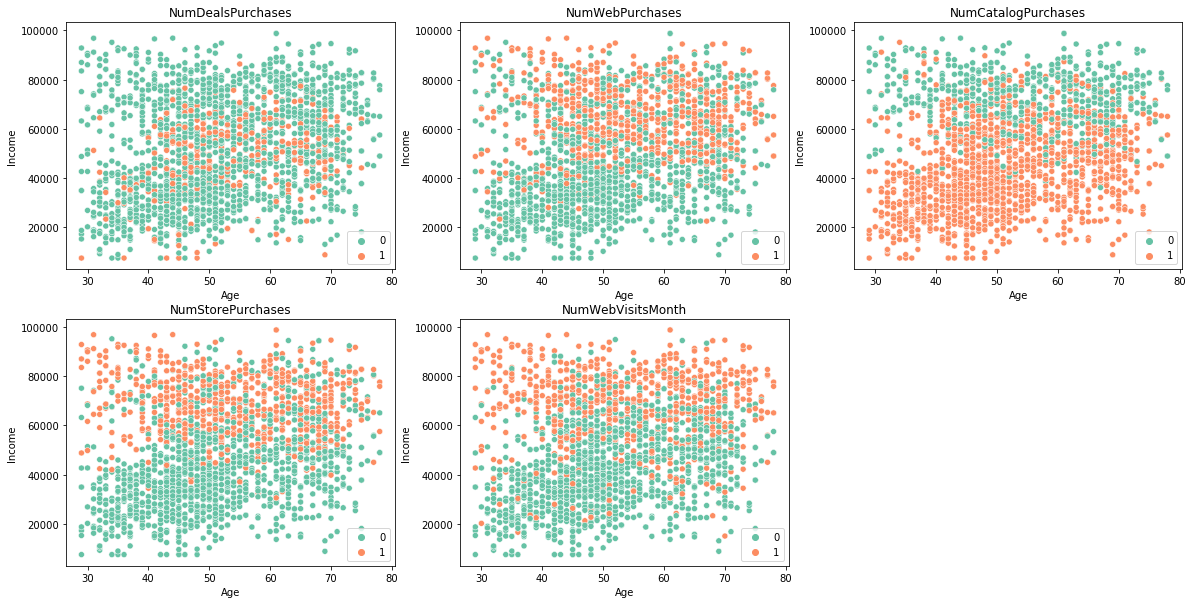

In [53]:
fig_k, axs_k = plt.subplots(nrows=2,ncols=3,figsize=(20,10))

plot_k('NumDealsPurchases',0,0)
plot_k('NumWebPurchases',0,1)
plot_k('NumCatalogPurchases',0,2)
plot_k('NumStorePurchases',1,0)
plot_k('NumWebVisitsMonth',1,1)
fig_k.delaxes(axs_k[1,2])

From the charts, K-Means show that **the income are more effective in grouping customer than age.** 

***

# Preparing Data for Machine Learning <a class="anchor" id="preparing"></a>

Before implementing a classifier, the dataset should be normalized, completed one-hot enconding and split data into trian and test.

## Normalizer Data <a class="anchor" id="normalizer"></a>

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm['Income'] = scaler.fit_transform(df_norm[['Income']])
df_norm['MntWines'] = scaler.fit_transform(df_norm[['MntWines']])
df_norm['MntFruits'] = scaler.fit_transform(df_norm[['MntFruits']])
df_norm['MntMeatProducts'] = scaler.fit_transform(df_norm[['MntMeatProducts']])
df_norm['MntFishProducts'] = scaler.fit_transform(df_norm[['MntFishProducts']])
df_norm['MntSweetProducts'] = scaler.fit_transform(df_norm[['MntSweetProducts']])
df_norm['MntGoldProds'] = scaler.fit_transform(df_norm[['MntGoldProds']])
df_norm['NumDealsPurchases'] = scaler.fit_transform(df_norm[['NumDealsPurchases']])
df_norm['NumWebPurchases'] = scaler.fit_transform(df_norm[['NumWebPurchases']])
df_norm['NumCatalogPurchases'] = scaler.fit_transform(df_norm[['NumCatalogPurchases']])
df_norm['NumStorePurchases'] = scaler.fit_transform(df_norm[['NumStorePurchases']])
df_norm['NumWebVisitsMonth'] = scaler.fit_transform(df_norm[['NumWebVisitsMonth']])

## One Hot Encoding Data <a class="anchor" id="one-hot"></a>

In [55]:
df_dummies = pd.get_dummies(df_norm,columns=['Education','Marital_Status','Country'])

## Train / Test Split Data <a class="anchor" id="train-test"></a>

In [56]:
df_dummies['Response'].value_counts()

0    1829
1     314
Name: Response, dtype: int64

The respone value is unbalance between 0 and 1. It will effect the algorithm. As a result, the dataset will be sampling 314 row of both 0 and 1 respose value.

In [57]:
df_sample_0 = df_dummies.query("Response == 0").sample(n=314,random_state=0)
df_sample_1 = df_dummies.query("Response == 1").sample(n=314,random_state=0)
df_sample = pd.concat([df_sample_0,df_sample_1])

In [58]:
X = df_sample.drop('Response',axis=1)
y = df_sample['Response']

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

***

# Machine Learning Algorithms <a class="anchor" id="machine-learning"></a>

Apply four algorithm to perform classifier.

## Logistic Regression Classifier <a class="anchor" id="logistic-regression"></a>

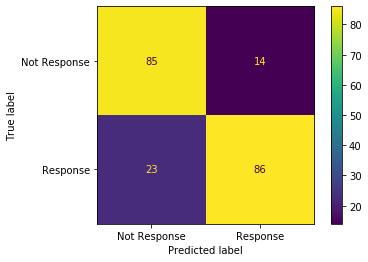

0.8221153846153846

In [60]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Not Response','Response'])  
plt.show()
clf.score(X_test, y_test)

The Logistic Regression Classifier performs well on this data set. It have 82.21% accuracy from test dataset.

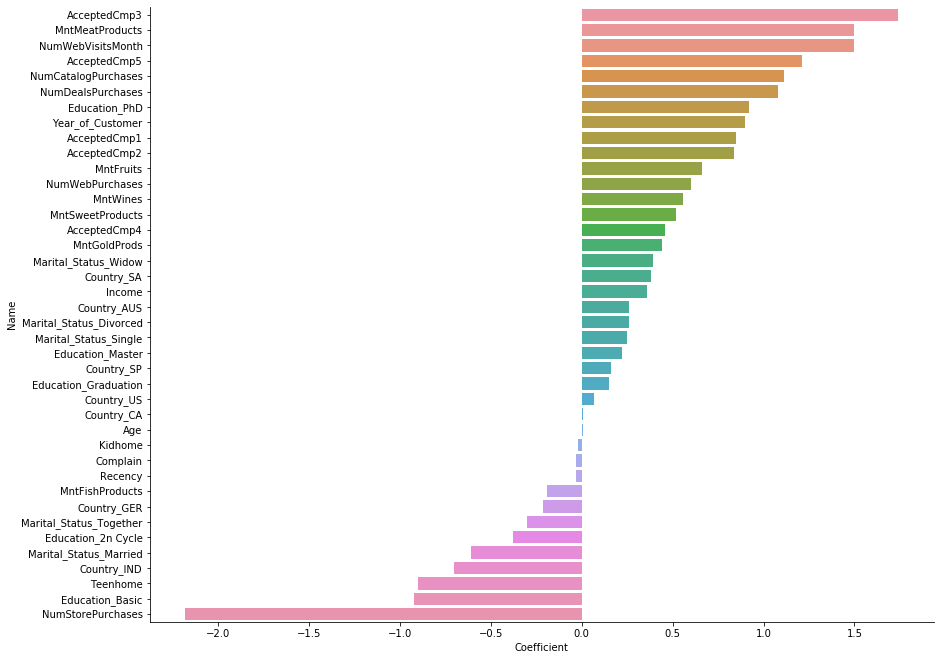

In [61]:
df_coef = pd.DataFrame({'Name':X_train.columns,'Coefficient': clf.coef_.round(2)[0]}).sort_values('Coefficient',ascending=False)
graph_coef = sns.catplot(x='Coefficient',y='Name', data=df_coef,kind='bar')
graph_coef.fig.set_size_inches(20,10)

The column which have high coefficient are:
- Positive coefficient:
    - Acceptant of 3rd campaign
    - Number of visiting website in Month
    - Amount of spending on meat product
    - Acceptant of 5rd campaign
    - Number of purchasing on catalog and deals
- Negative coefficient:
    - Number of purchasing at store
    - Having basic education
    - Having teen at home
    - The IND country
    - Married

These are the recommendation from logistic regression classifier:
- The company can learn from 3rd campaign and 5th campaign because the person who accept 3rd and 5th campaign likely to accept the last campaign. 
- The number of visiting website in Month also has impact on this. 
- The person who purchase on catalog and deals has tentative to accept the last campaign.
- The person who spend more on meat likely to accept the last campaign.
- The person who purchasing more purchasing at store not like the last campaign. 
- The last campaign not attractive to people who has basic education, or has teen at home, or lives in IND country, or has already married.

## Decision Tree Classifier <a class="anchor" id="decision-tree"></a>

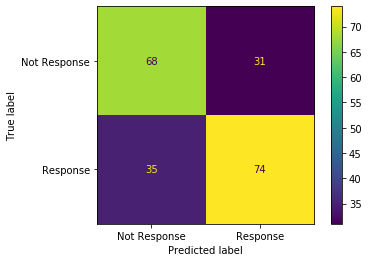

0.6826923076923077

In [62]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Not Response','Response'])  
plt.show()
clf.score(X_test, y_test)

The Decision Tree Classifier does not perform well. it have 68.26% accuracy from test dataset. The tree are visualized as below.

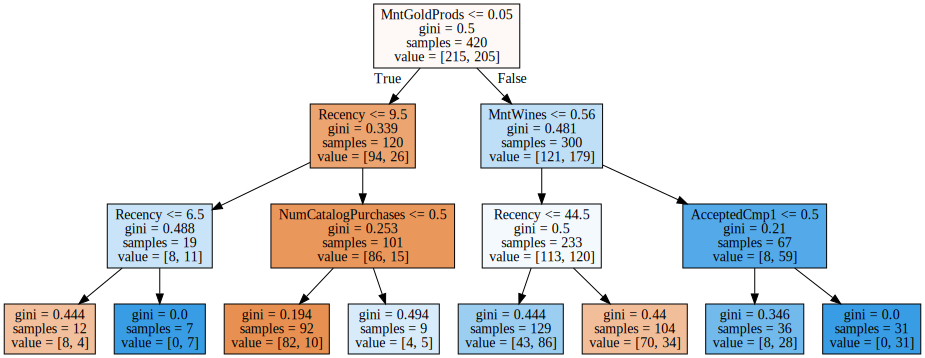

In [63]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

## Support Vertor Machine Classifier <a class="anchor" id="svc"></a>

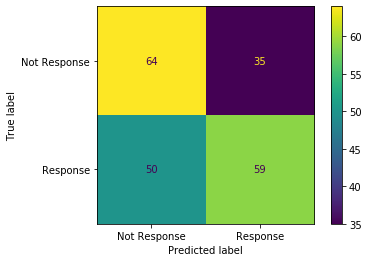

0.5913461538461539

In [64]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,y_train)
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Not Response','Response'])  
plt.show()
clf.score(X_test, y_test)

The Support Vertor Machine Classifier does not performed well.

## Gradient Boosting Classifier <a class="anchor" id="gradient-boosting-classifier"></a>

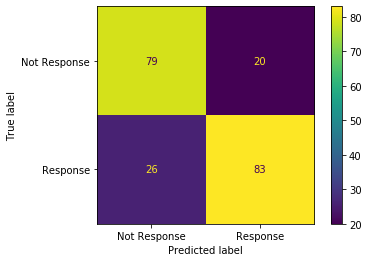

0.7788461538461539

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=4)
clf.fit(X_train,y_train)
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Not Response','Response'])  
plt.show()
clf.score(X_test, y_test)

Gradient Boosting Classifier does perform well. On the other hand, comparing to Logistic Regression, it has lower performance.

***